# Reddit News Headlines and Stock Market Performance

In the current financial market, predicting daily stock prices using daily news as input is clearly a very complex task. Moreover, the market is very volatile because it is a result of multiple factors that change continuously. 


Our research questions are centered around using reddit data to predict the Dow Jones stock average in two different ways, using text word count and using text sentiment of reddit headlines. 

Our research questions are:

<b> 1. Can the text content of reddit daily news headlines be used to predict past stock prices? </b>

<b>    2. Can the sentiment of reddit daily news headlines be used to predict past stock prices? </b>


## Load and Clean Data

Begin by loading and formating the data. 

Dataset includes the top 25 most viewed news stories from reddit for a day and the Dow Jones stock performance over this time.

In [172]:
#
import pandas as pd

com_news_df = pd.read_csv('data/Combined_News_DJIA.csv')
com_news_df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [174]:
#DJIA_data = pd.read_csv('C:/Users/Yonas/OneDrive/Desktop/IMT 575/Group Project/Files/upload_DJIA_table.csv')
DJIA_data = pd.read_csv('data/upload_DJIA_table.csv')

#DJIA_data.info()

In [175]:
#Look at the shape of the data
print(com_news_df.shape, DJIA_data.shape )

(1989, 27) (1989, 7)


Merge the Dow Jones and the top news from reddit together. Also create a copy of the DF in order to use for sentiment analysis later.

In [176]:
merged_data = com_news_df.merge(DJIA_data, how = 'inner', on = 'Date', left_index = True)

merged_data_sent = merged_data.copy()

In [177]:
merged_data.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727


Merge all 25 top headlines together

In [178]:
# to combine the first 25 coulums of the top news in

top25_headlines = []

for row in range(0, len(merged_data.index)):
    top25_headlines.append(' '.join( str(x) for x in merged_data.iloc[row, 2:27]))

Optionally delete other extra columns of data [2:27]]


In [181]:

#merged_data.drop(merged_data.iloc[:, 3:28], inplace = True, axis = 1)
#merged_data

Sort the columns by date

In [218]:
merged_data = merged_data.sort_values(by="Date")
#merged_data.head(2)

Hide ipython warning messages

In [183]:
%%javascript
(function(on) {
const e=$( "<a>Setup failed</a>" );
const ns="js_jupyter_suppress_warnings";
var cssrules=$("#"+ns);
if(!cssrules.length) cssrules = $("<style id='"+ns+"' type='text/css'>div.output_stderr { } </style>").appendTo("head");
e.click(function() {
    var s='Showing';  
    cssrules.empty()
    if(on) {
        s='Hiding';
        cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
    }
    e.text(s+' warnings (click to toggle)');
    on=!on;
}).click();
$(element).append(e);
})(true);

<IPython.core.display.Javascript object>

# Preprocessing the code

Next clean the data to make the machine learning models more effective.

Use regex to remove stopwords and to lemmatize all of the top 25 headlines.

In [184]:
import regex as re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def prepro_text(target_text):
    # if b'/b"
    target_text = re.sub(r"^b[\'\"]", '', target_text)
    target_text = re.sub(r"[^\w\s]", '', target_text)
    target_text = target_text.lower().strip()
    target_text = target_text.split()
    target_text = ' '.join([x for x in target_text if x not in stopwords.words('english')])
    return target_text

In [185]:
# applymap to the whole dataframe
#Takes a while to run this because needs to clean every row of data

merged_data.iloc[:,2] = merged_data.iloc[:,2:].applymap(lambda element:prepro_text(str(element)))
merged_data.head()

# com_news_df.to_csv('cleaned_Combined_News_DJIA.csv')

,Date,Label,top25_headlines,Top1,Top2,Top3,Top4,Top5,Top6,Top7,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,georgia downs two russian warplanes countries ...,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,wont america nato help us wont help us help ir...,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,remember adorable 9yearold sang opening ceremo...,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,0,us refuses israel weapons attack iran report b...,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,1,experts admit legalise drugs bwar south osetia...,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


<h1> Run Model for TFIDF and Embeddings </h1>

Import train test split. Use the top 25 headlines combined together as the X variable. 

The Y variable is a binary label which shows whether or not the stock market went up or down.

In [240]:
from sklearn.model_selection import train_test_split

X = merged_data['top25_headlines']
y = merged_data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Import the count vectorizer and tensorflow.

In [241]:
# # Takes a while to load the tensforlow model

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from tqdm.auto import tqdm
from sklearn.preprocessing import MaxAbsScaler
# Universal Sentence Encoder
import tensorflow_hub as hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
use = hub.load(module_url)
print("module %s loaded" % module_url)
import numpy as np

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


Import the Tfidf vectorizer. 

Create a function to run the model with either TFIDF or embedding.

In [242]:
from sklearn.feature_extraction.text import TfidfVectorizer
# return the vectors
def text_vector(target_method='tfidf', \
                target_list_train=X_train.to_list(),\
                target_list_test = X_test.to_list(),\
                max_features=None):
    """
    type: target_method: string - ("tfidf", "embedding")
    rtype: list of vectors
    """
    

    if target_method == "embedding":
        use_x_train = []
        use_x_test = []
        use_x_train = use(target_list_train)
        use_x_test = use(target_list_test)
        return use_x_train, use_x_test
    
    if target_method == "tfidf":
        vectorizer = TfidfVectorizer(max_features=max_features)
        tfidf_train = vectorizer.fit_transform(target_list_train)
        tfidf_test = vectorizer.transform(target_list_test)
        tfidf_scaler = MaxAbsScaler()
        tfidf_x_train = tfidf_scaler.fit_transform(tfidf_train)
        tfidf_x_test = tfidf_scaler.transform(tfidf_test)
        return tfidf_x_train, tfidf_x_test

### TFIDF Logistic Regression 

In [243]:
%%time

tfidf_x_train, tfidf_x_test = text_vector("tfidf", X_train, X_test)

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(tfidf_x_train, y_train)

predictions = logmodel.predict(tfidf_x_test)
#print(accuracy_score(y_test, predictions))

accuracy_tfidf = accuracy_score(y_test, predictions)
percentage = "{:.2%}".format(accuracy_tfidf)
print("accuracy percentage is", percentage)



accuracy percentage is 51.51%
Wall time: 1.18 s


We got an accuracy below 50% for the TFIDF logistic regression.

### Embeddings Logistic Regression

In [244]:
%%time

# embedding
embedding_x_train, embedding_x_test = text_vector("embedding")

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(embedding_x_train, y_train)

predictions = logmodel.predict(embedding_x_test)
#print(accuracy_score(y_test, predictions))

accuracy_embeddings = accuracy_score(y_test, predictions)
percentage = "{:.2%}".format(accuracy_embeddings)
print("accuracy percentage is", percentage)



accuracy percentage is 51.01%
Wall time: 3.17 s


We got a slightly better accuracy with embeddings and logistic regression.

<h3> MLP classfier </h3>


In [245]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

clf = MLPClassifier(max_iter = 300).fit(tfidf_x_train, y_train)
predictions = clf.predict(tfidf_x_test)

accuracy_score(y_test, predictions)

accuracy_stock_mlp = accuracy_score(y_test, predictions)
percentage = "{:.2%}".format(accuracy_stock_mlp)
print("accuracy percentage is", percentage)

accuracy percentage is 47.99%


# Text related to stock 

### Filter the dataset for stock related keywords

Now we want to look at the performance of our models based on only stock related keywords. 

Used the column with the top 25 headlines to get the new dataframe with stock related keywords only. 

The new dataframe has 553 rows compared to close to 2,000 for the original column.

In [226]:
stock_related_keywords = "stock|market|feds|bond|bonds|stocks|bull|bear"

import numpy as np

temp_df = merged_data.copy()

merged_data_keywords = temp_df[['top25_headlines', 'Label']]

merged_data_keywords['Label'] = merged_data_keywords['Label'].astype(str)

mask = np.column_stack([merged_data_keywords[col].str.contains(stock_related_keywords, na=False) for col in merged_data_keywords])
stock_keyword = merged_data_keywords.loc[mask.any(axis=1)]

stock_keyword['Label'] = stock_keyword['Label'].astype(int)
 
#stock_keyword

<ipython-input-226-b5987a2b85a0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_keywords['Label'] = merged_data_keywords['Label'].astype(str)
<ipython-input-226-b5987a2b85a0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_keyword['Label'] = stock_keyword['Label'].astype(int)


Train test split for stock keyword dataframe.

In [235]:
from sklearn.model_selection import train_test_split

X = stock_keyword['top25_headlines']
y = stock_keyword.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Run With TFIDF

In [236]:
tfidf_x_train, tfidf_x_test = text_vector("tfidf", \
                                          X_train,\
                                          X_test
                                         )

In [233]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(tfidf_x_train,y_train)
predictions = logmodel.predict(tfidf_x_test)

accuracy_stock_tfidf = accuracy_score(y_test, predictions)
percentage = "{:.2%}".format(accuracy_stock_tfidf)
print("accuracy percentage is", percentage)

accuracy percentage is 54.55%


## Run with MLP

In [237]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

clf = MLPClassifier(max_iter = 300).fit(tfidf_x_train, y_train)
predictions = clf.predict(tfidf_x_test)

accuracy_score(y_test, predictions)

accuracy_stock_mlp = accuracy_score(y_test, predictions)
percentage = "{:.2%}".format(accuracy_stock_mlp)
print("accuracy percentage is", percentage)

accuracy percentage is 56.06%


# Sentiment Analysis 

Next we will move on to our second research question:

<b> Can the sentiment of reddit daily news headlines be used to predict past stock prices? </b>

Write function to get the sentiment using vader and textblob.

In [198]:
#uses textblob to get the sentiment scores of the column 
import nltk
nltk.download('vader_lexicon')
from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment import vader
sia = vader.SentimentIntensityAnalyzer()

def text_sent(target_method, target_list_text):
    """
    
    rtype: list of entiment scores
    """
    if target_method == 'blob':
        blob_list = []
        for title in target_list_text:
            blob = TextBlob(title)
            blob_list.append(blob.sentiment.polarity)
    
        return blob_list
    
    if target_method == 'NLTK':
        NLTK_list = []

        for title in target_list_text:
            sia_polarity = sia.polarity_scores(title)
            NLTK_list.append(sia_polarity['compound'])
        return NLTK_list

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Josh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Get the average sentiment for blob and Vader

In [199]:
# Average sentiment for column by blob

column_list_blob = []

for i in range(1,23):
    #print(i,'i is')
    i_str = str(i)
    Topic = ('Top'+i_str) # 'Top' + 1 = 'Top1'
    Topic_sent_blob = (Topic + '_sent_' 'blob') 
    topic_list = text_sent("blob",merged_data_sent[Topic])
    merged_data_sent[Topic_sent_blob] = topic_list
    column_list_blob.append(Topic_sent_blob)


merged_data_sent_sum_blob = merged_data_sent[column_list_blob].sum(axis=1)
merged_data_sent["average_blob_sent"] = merged_data_sent_sum_blob / 22

 
# Average sentiment by column for NLTK   


column_list_nltk = []

for i in range(1,23):
    i_str = str(i)
    Topic = ('Top'+i_str)
    Topic_sent_nltk = (Topic + '_sent_' 'NLTK')
    topic_list = text_sent("NLTK",merged_data_sent[Topic])
    merged_data_sent[Topic_sent_nltk] = topic_list
    column_list_nltk.append(Topic_sent_nltk)

merged_data_sent_sum_nltk = merged_data_sent[column_list_nltk].sum(axis=1)
merged_data_sent["average_nltk_sent"] = merged_data_sent_sum_nltk / 22 
    


In [200]:
#merged_data_sent['Top23']

Create a DF with just the average blob sent and the average nltk sent. Get the average sent for each day

In [201]:
label_sent_df= merged_data_sent[['average_nltk_sent', 'average_blob_sent', 'Label']]

print('average NLTK sent is' , round(label_sent_df["average_nltk_sent"].mean(),2))
print('average Blob sent is' , round(label_sent_df["average_blob_sent"].mean(),2))
label_sent_df

average NLTK sent is -0.21
average Blob sent is 0.01


,average_nltk_sent,average_blob_sent,Label
1988,-0.318659,-0.048722,0
1987,-0.114414,0.030705,1
1986,-0.264577,-0.041955,0
1985,-0.131123,0.005201,0
1984,-0.157518,0.054723,1
...,...,...,...
4,-0.150886,-0.007135,0
3,-0.003755,0.036262,1
2,-0.282536,0.034246,1
1,-0.214800,0.020274,1


Check if positive sentiment for the day is related to a rise in stock prices. 

If the Dow Jones went up and the sentiment was postive mark as "correct". If the Dow Jones went up and sentiment was down mark as incorrect. 

If the Dow Jones went down and the sentiment was postive mark as "incorrect". If the Dow Jones went down and sentiment was down marka as incorrect. 

Do this for both vader and blob.

In [202]:
nltk_correct = []
blob_correct = []


for average_nltk_sent, average_blob_sent, Label in label_sent_df.itertuples(index=False):
    if average_nltk_sent <0:
        if Label == 0:
            correct = 1
            nltk_correct.append(1)
        else:
            correct = 0
            nltk_correct.append(0)
    else:
    #if average_nltk_sent > 0:
        if Label == 1:
            correct = 1
            nltk_correct.append(1)
        else:
            correct = 0
            nltk_correct.append(0)
            
    if average_blob_sent <0:
        if Label == 0:
            correct = 1
            blob_correct.append(1)
        else:
            correct = 0
            blob_correct.append(0)
    else:
    #if average_nltk_sent > 0:
        if Label == 1:
            correct = 1
            blob_correct.append(1)
        else:
            correct = 0
            blob_correct.append(0)

label_sent_df['nltk_correct_score'] = nltk_correct
label_sent_df['blob_correct_score'] = blob_correct

    
#label_sent_df 



<ipython-input-202-514128ad4fb7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_sent_df['nltk_correct_score'] = nltk_correct
<ipython-input-202-514128ad4fb7>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_sent_df['blob_correct_score'] = blob_correct


Insert extra columns in DF showing if the blob or vader sent was negative or postive

In [203]:
import numpy as np

average_blob_sent_pos = []
for x in label_sent_df['average_blob_sent']:
    if x > 0:
        average_blob_sent_pos.append(1)
    else:
        average_blob_sent_pos.append(0)

label_sent_df['average_blob_sent_pos'] = average_blob_sent_pos

average_nltk_sent_pos = []
for x in label_sent_df['average_nltk_sent']:
    if x > 0:
        average_nltk_sent_pos.append(1)
    else:
        average_nltk_sent_pos.append(0)

label_sent_df['average_nltk_sent_pos'] = average_nltk_sent_pos


label_sent_df['nltk_equals_blob_pos'] = (label_sent_df['average_nltk_sent_pos']==label_sent_df['average_blob_sent_pos']).astype(int)

#label_sent_df



<ipython-input-203-0c79e7c9b74c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_sent_df['average_blob_sent_pos'] = average_blob_sent_pos
<ipython-input-203-0c79e7c9b74c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_sent_df['average_nltk_sent_pos'] = average_nltk_sent_pos
<ipython-input-203-0c79e7c9b74c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

Create plots based of the amount of postives days for both vader and blob sent. 

Also compare how many of the vader sentiment matching the blob sentiment. 

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt



label_sent_df['nltk_equals_blob_pos'] = label_sent_df.nltk_equals_blob_pos.astype(bool)
label_sent_df['average_blob_sent_pos'] = label_sent_df.average_blob_sent_pos.astype(bool)
label_sent_df['average_nltk_sent_pos'] = label_sent_df.average_nltk_sent_pos.astype(bool)
label_sent_df['nltk_correct_score'] = label_sent_df.nltk_correct_score.astype(bool)
label_sent_df['blob_correct_score'] = label_sent_df.blob_correct_score.astype(bool)

<ipython-input-204-5c11b75d0e28>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_sent_df['nltk_equals_blob_pos'] = label_sent_df.nltk_equals_blob_pos.astype(bool)
<ipython-input-204-5c11b75d0e28>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_sent_df['average_blob_sent_pos'] = label_sent_df.average_blob_sent_pos.astype(bool)
<ipython-input-204-5c11b75d0e28>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

### Vader VS Textblob Average Daily Sentiment 

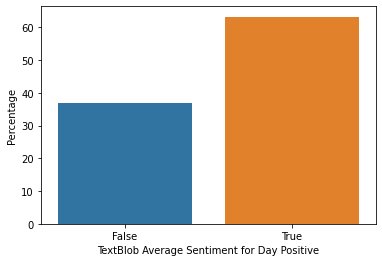

In [205]:
percentage = lambda i: len(i) / float(len(x)) * 100

x= label_sent_df['average_blob_sent_pos']
ax = sns.barplot(x=x, y=x,  estimator=percentage)
ax.set(ylabel="Percentage", xlabel = 'TextBlob Average Sentiment for Day Positive')
plt.show()


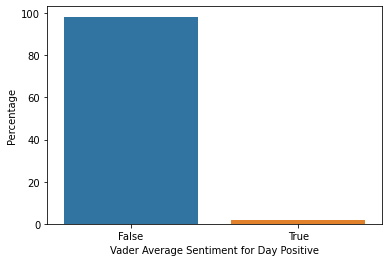

In [206]:
x= label_sent_df['average_nltk_sent_pos']
ax = sns.barplot(x=x, y=x,  estimator=percentage)
ax.set(ylabel="Percentage", xlabel = 'Vader Average Sentiment for Day Positive')
plt.show()

While Textblob only had 39% of days with an average sentiment score, Vader had over 90% of days with a negative sentiment score.

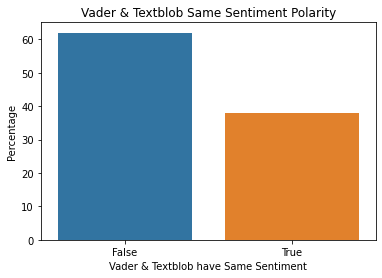

In [207]:
percentage = lambda i: len(i) / float(len(x)) * 100

x= label_sent_df['nltk_equals_blob_pos']
ax = sns.barplot(x=x, y=x,  estimator=percentage)
ax.set(ylabel="Percentage", xlabel = 'Vader & Textblob have Same Sentiment', title = 'Vader & Textblob Same Sentiment Polarity')
plt.show()

Unsuprisingly, Vader and Textblob only match on polarity (neg and neg or pos and pos) around 40% of the time 

### Vader and Texblob Match with Dow Jones

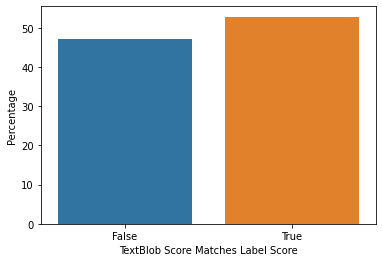

In [208]:
x= label_sent_df['blob_correct_score']
ax = sns.barplot(x=x, y=x,  estimator=percentage)
ax.set(ylabel="Percentage", xlabel = 'TextBlob Score Matches Label Score')
plt.show()


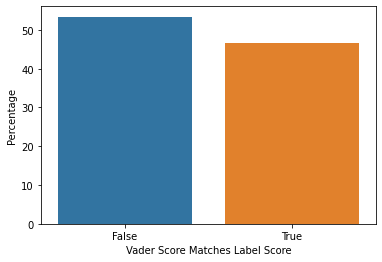

In [209]:
x= label_sent_df['nltk_correct_score']
ax = sns.barplot(x=x, y=x,  estimator=percentage)
ax.set(ylabel="Percentage", xlabel = 'Vader Score Matches Label Score')
plt.show()

Textblob does a slightly better job of matching the Dow Jones average, however both Textblob and Vader match right around 50% of the time.

# Sentiment With Decision Tree and Logistic Regression Models

### Logistic Regression Model

Perform a logistic regression model using sentiment to predict if stocks went up or down.

Use text blob and NLTK as the X and the Dow Jones label of whether Dow Jones went down or up as the y.

#### Texblob 

In [210]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear')


X = merged_data_sent[['average_blob_sent']]
y = merged_data_sent['Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       179
           1       0.55      1.00      0.71       219

    accuracy                           0.55       398
   macro avg       0.28      0.50      0.35       398
weighted avg       0.30      0.55      0.39       398



C:\Users\Josh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


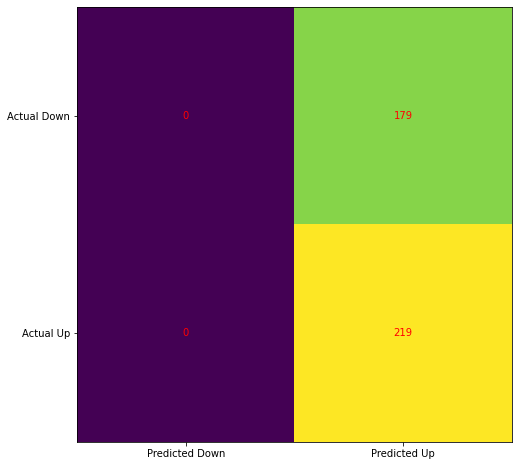

In [211]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions_blob = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_blob))

cm = confusion_matrix(y_test, predictions_blob)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Down', 'Predicted Up'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Down', 'Actual Up'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

<b> Vader </b>

In [212]:
#need to split into blob and NLTK and not combine together.



from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear', random_state=0)


X = merged_data_sent[['average_nltk_sent']]
y = merged_data_sent['Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\Josh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       190
           1       0.52      1.00      0.69       208

    accuracy                           0.52       398
   macro avg       0.26      0.50      0.34       398
weighted avg       0.27      0.52      0.36       398



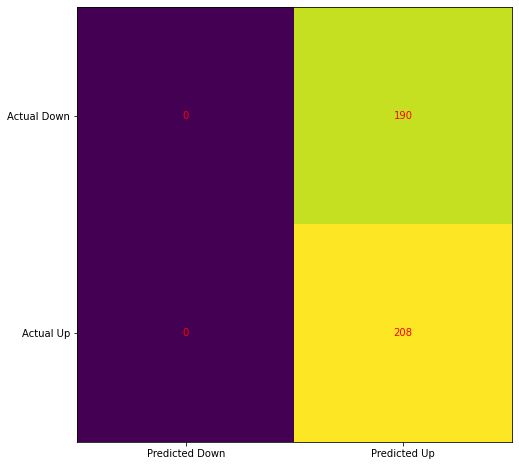

In [213]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions_nltk = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_nltk))

cm = confusion_matrix(y_test, predictions_nltk)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Down', 'Predicted Up'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Down', 'Actual Up'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

The vader logistic regression model was slightly more accurate than the textblob.

# Decision Tree Classifier

<b> TextBlob </b>

In [214]:
from sklearn.tree import DecisionTreeClassifier

classifier_tree = DecisionTreeClassifier()

X_blob = merged_data_sent[['average_blob_sent']]
y_blob = merged_data_sent['Label']


X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size=0.2)

Decision Tree Classifier using text blob 
               precision    recall  f1-score   support

           0       0.46      0.49      0.47       175
           1       0.58      0.56      0.57       223

    accuracy                           0.53       398
   macro avg       0.52      0.52      0.52       398
weighted avg       0.53      0.53      0.53       398



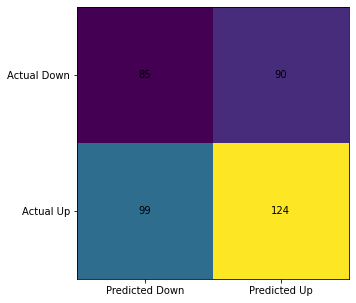

In [215]:
y_predict_blob = classifier_tree.fit(X_train, y_train).predict(X_test)

print("Decision Tree Classifier using text blob \n",classification_report(y_test, y_predict_blob))


cm = confusion_matrix(y_test, y_predict_blob)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Down', 'Predicted Up'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Down', 'Actual Up'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

#### Vader

In [216]:
from sklearn.tree import DecisionTreeClassifier

classifier_tree = DecisionTreeClassifier()

X_nltk = merged_data_sent[['average_nltk_sent']]
y_nltk = merged_data_sent['Label']


X_train, X_test, y_train, y_test = train_test_split(X_nltk, y_nltk, test_size=0.2)

Decision Tree Classifier using NLTK 
               precision    recall  f1-score   support

           0       0.49      0.47      0.48       201
           1       0.48      0.50      0.49       197

    accuracy                           0.48       398
   macro avg       0.49      0.49      0.48       398
weighted avg       0.49      0.48      0.48       398



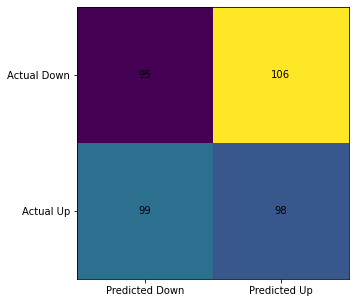

In [217]:
y_predict_nltk = classifier_tree.fit(X_train, y_train).predict(X_test)

print("Decision Tree Classifier using NLTK \n", classification_report(y_test, y_predict_nltk))


cm = confusion_matrix(y_test, y_predict_nltk)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Down', 'Predicted Up'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Down', 'Actual Up'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

For the decision tree, both vader and textblob had similar accuracy results. 

# Overall Conclusions

### TFIDF and Embeddings


- In general, our models do not predict the trend of the Dow Jones Industrial Average of each day very well. <br>

- Even though we acheived 51% and 57% accuracy scores, they are still too low to say with any certainty that they are good at predicting the market.  With related keywords such as “stock” or “market”, we have increased accuracy by over 5% for our logistic regression model. 

- We believe that our input variables are not noisy, because we were able to increase our accuracy for machine learning models by adding filters and selecting more related variables out of the original data sets, such as selecting the texts with the key words, etc. 


### Sentiment

- Textblob and Vader produced extremely different average sentiment scores.

- Both Textblob and Vader have average accuracies around 53%, with the best average accuracy at 54% and logistic regression with slightly higher accuracies. 

- Our decision tree model has a realistic distribution than the logistic regression model as it is a lot less skewed.
